# Generate Time Series CSV to be Merged in QGIS with a Point Layer.

In QGIS we created a point layer representing environmental measurement stations named `my_stations`. One of the point layer attributes is named `info`. In fact it contains the station id, i.e. "S01", "S02", "S03", etc. 

In this notebook sinusoidal time series are created as test data. The goal is to learn how to use the temporal manager in QGIS. The time series data must be provided in a 1:N relation, i.e. with the relation schema (station_id (sid), timestamp (ts), value (val)). In this notebook the relation is named `df_long` and exported as `ts_sin.csv` (time series sinusoidal). 

This csv file is to be imported in QGIS as delimited text file without coordinate into, i.e. just a table. The relations `my_stations` and `ts_sin` are then joined with the condition `ts_sin(sid) == my_stations(info)`.

The resulting new point layer in QGIS looks in principle (but not exactly) like:

| sid | name |  ts | val |  lat | lon |
|-----------:|---:|-----------:|-----------:|-----:|----:|
|         S01 | Duisburg | 1980-01-01 |       12.3 | 51.2 | 7.0 |
|         S01 | Duisburg | 1981-01-01 |       11.3 | 51.2 | 7.0 |
|         S01 | Duisburg | 1982-01-01 |       11.7 | 51.2 | 7.0 |
|        ... |        ... |        ... |  ... | ... |
|         S10 | Herne | 1980-01-01 |       13.5 | 50.7 | 6.5 |
|         S10 | Herne | 1981-01-01 |       12.7 | 50.7 | 6.5 |
|         S10 | Herne | 1982-01-01 |       13.1 | 50.7 | 6.5 |
|        ... |        ... |        ... |  ... | ... |

**Result: Many points are plotted on top of each other! There are several "Duisburg" point snow with different values.** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dr = pd.date_range("2022-03-01T00:00:00", 
                   "2022-03-03T00:00:00",
                   freq="h",
                   tz="UTC",
                   inclusive="both")

In [3]:
dr.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64')

In [19]:
#help(pd.date_range)

In [5]:
#t = np.arange(0.,24.000001,0.5)
t = dr.hour
t

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64')

## Exercise: Increase the temporal resolution of the date range.

Replace argument `freq="h"` with `periods=1000`. 

Calculate fractional hours (float) from `dr.hour`, `dr.minute`, `dr.second`

`th = dr.hour + ...`

In [23]:
# your code
# t = dr.hour + ...

## Generate your own time series.

**Function to create sinusoidal time series**

$$
p(t,A,A_0,T,\Delta t) = A\sin(\frac{2\pi}{T}(t-\Delta t))+A_0
$$

In [6]:
def p(t, A=1., A0=0., T=24., Dt=0.):
    return A*np.sin(2*np.pi/T*(t-Dt))+A0

**Create time series with different phases (time shift)**

In [7]:
A0=1.
p01 = p(t, A0=A0)
p02 = p(t, Dt=3., A0=A0)
p03 = p(t, Dt=6., A0=A0a)
p04 = p(t, Dt=9., A0=A0)
p05 = p(t, Dt=12., A0=A0)
p06 = p(t, Dt=15., A0=A0)
p07 = p(t, Dt=18., A0=A0)
p08 = p(t, Dt=21., A0=A0)
#p09 = p(t, Dt=24., A0=A0)

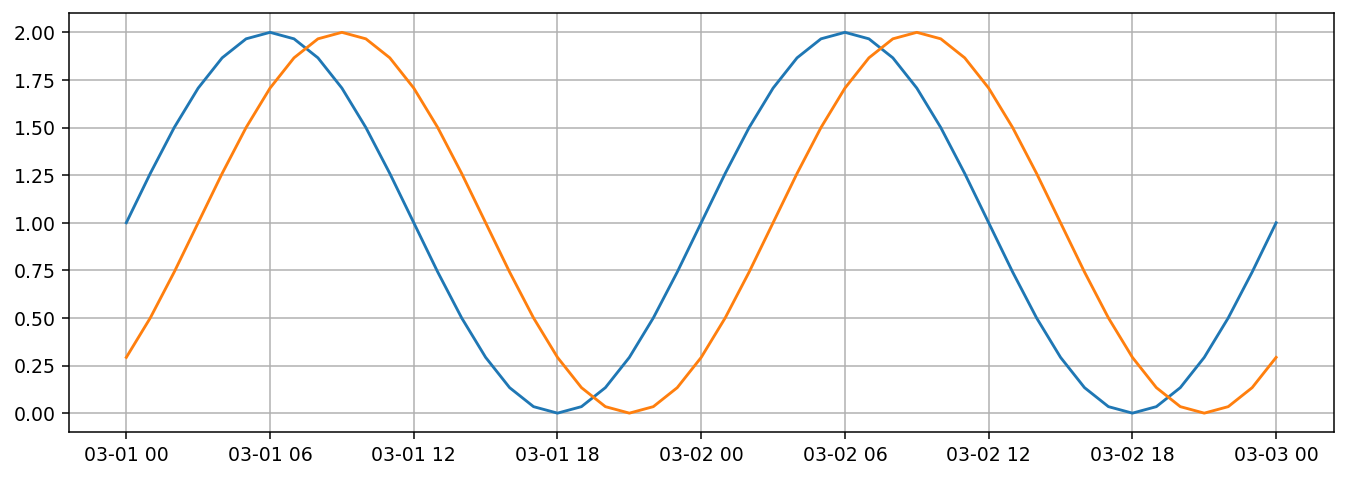

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,4), dpi=136)
ax1.plot(dr,p01)
ax1.plot(dr,p02)
ax1.grid(True)
plt.show()

**Combine all series in a "wide" dataframe. Start with `dict()`.** 

In [9]:
data_dict = {
    "S01" : p01, 
    "S02" : p02,
    "S03" : p03,
    "S04" : p04,
    "S05" : p05,
    "S06" : p06,
    "S07" : p07,
    "S08" : p08
}

In [10]:
df = pd.DataFrame.from_dict(data_dict)

In [11]:
df.set_index(dr, inplace=True)

In [12]:
df.head()

,S01,S02,S03,S04,S05,S06,S07,S08
2022-03-01 00:00:00+00:00,1.000000,0.292893,0.000000,0.292893,1.000000,1.707107,2.000000,1.707107
2022-03-01 01:00:00+00:00,1.258819,0.500000,0.034074,0.133975,0.741181,1.500000,1.965926,1.866025
2022-03-01 02:00:00+00:00,1.500000,0.741181,0.133975,0.034074,0.500000,1.258819,1.866025,1.965926
2022-03-01 03:00:00+00:00,1.707107,1.000000,0.292893,0.000000,0.292893,1.000000,1.707107,2.000000
2022-03-01 04:00:00+00:00,1.866025,1.258819,0.500000,0.034074,0.133975,0.741181,1.500000,1.965926


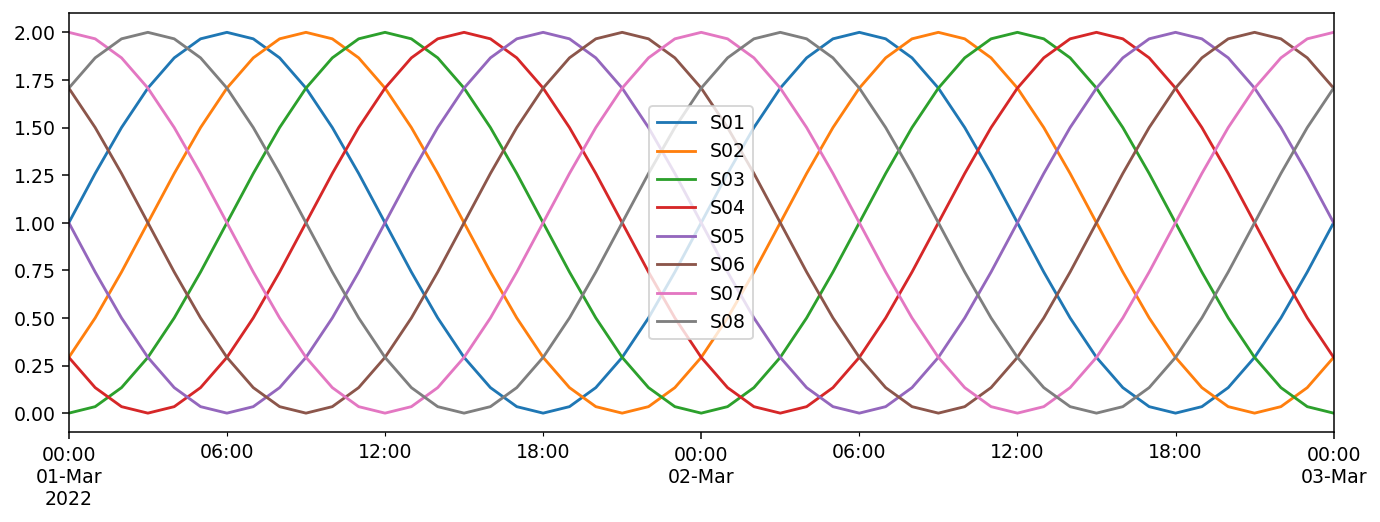

In [13]:
fig2, ax2 = plt.subplots(figsize=(12,4), dpi=136)
df.plot(ax=ax2)
plt.show()

In [14]:
type(df["S01"])

pandas.core.series.Series

In [15]:
df.columns

Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'], dtype='object')

**Select all series and print one after the other.**

In [16]:
for sid in df.columns:
    df_tmp = pd.DataFrame(df[sid])
    df_tmp["sid"]=sid
    df_tmp.rename(columns={sid:"val"},inplace=True)
    print(df_tmp.head())

                                val  sid
2022-03-01 00:00:00+00:00  1.000000  S01
2022-03-01 01:00:00+00:00  1.258819  S01
2022-03-01 02:00:00+00:00  1.500000  S01
2022-03-01 03:00:00+00:00  1.707107  S01
2022-03-01 04:00:00+00:00  1.866025  S01
                                val  sid
2022-03-01 00:00:00+00:00  0.292893  S02
2022-03-01 01:00:00+00:00  0.500000  S02
2022-03-01 02:00:00+00:00  0.741181  S02
2022-03-01 03:00:00+00:00  1.000000  S02
2022-03-01 04:00:00+00:00  1.258819  S02
                                val  sid
2022-03-01 00:00:00+00:00  0.000000  S03
2022-03-01 01:00:00+00:00  0.034074  S03
2022-03-01 02:00:00+00:00  0.133975  S03
2022-03-01 03:00:00+00:00  0.292893  S03
2022-03-01 04:00:00+00:00  0.500000  S03
                                val  sid
2022-03-01 00:00:00+00:00  0.292893  S04
2022-03-01 01:00:00+00:00  0.133975  S04
2022-03-01 02:00:00+00:00  0.034074  S04
2022-03-01 03:00:00+00:00  0.000000  S04
2022-03-01 04:00:00+00:00  0.034074  S04
                

In [18]:
#df_tmp

## Exercise: Concatenate all series in a persistent "long" dataframe.

**Save `df_long` to `./data/ts_sin.csv`.**

In [20]:
#df_long.to_csv("./data/ts_sin.csv")